In [59]:
import pandas as pd
from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame
import pycountry
import pycountry_convert as pc
import numpy as np
import json
import matplotlib.pyplot as plt


In [60]:
ip_to_location = pd.read_csv('/home/kin672/gentb-summer22/Geography/ip_to_location.csv')
isolate_to_location = pd.read_csv('/home/kin672/gentb-summer22/Geography/ISOLATE_TO_LOCATION.csv')

In [61]:
def fix_dc(location):
    if 'Washington, D.C.' in str(location):
        location = location.replace('Washington, Washington, D.C.', 'Washington, D.C.')
    return(location)

In [62]:
ip_to_location['location'] = [fix_dc(location) for location in ip_to_location.location]

In [63]:
expanded_locations = ip_to_location['location'].str.split(', ', expand = True)
expanded_locations.columns = ['City', 'State/Region', 'Country']
ip_to_location = pd.concat([ip_to_location, expanded_locations], axis = 1)

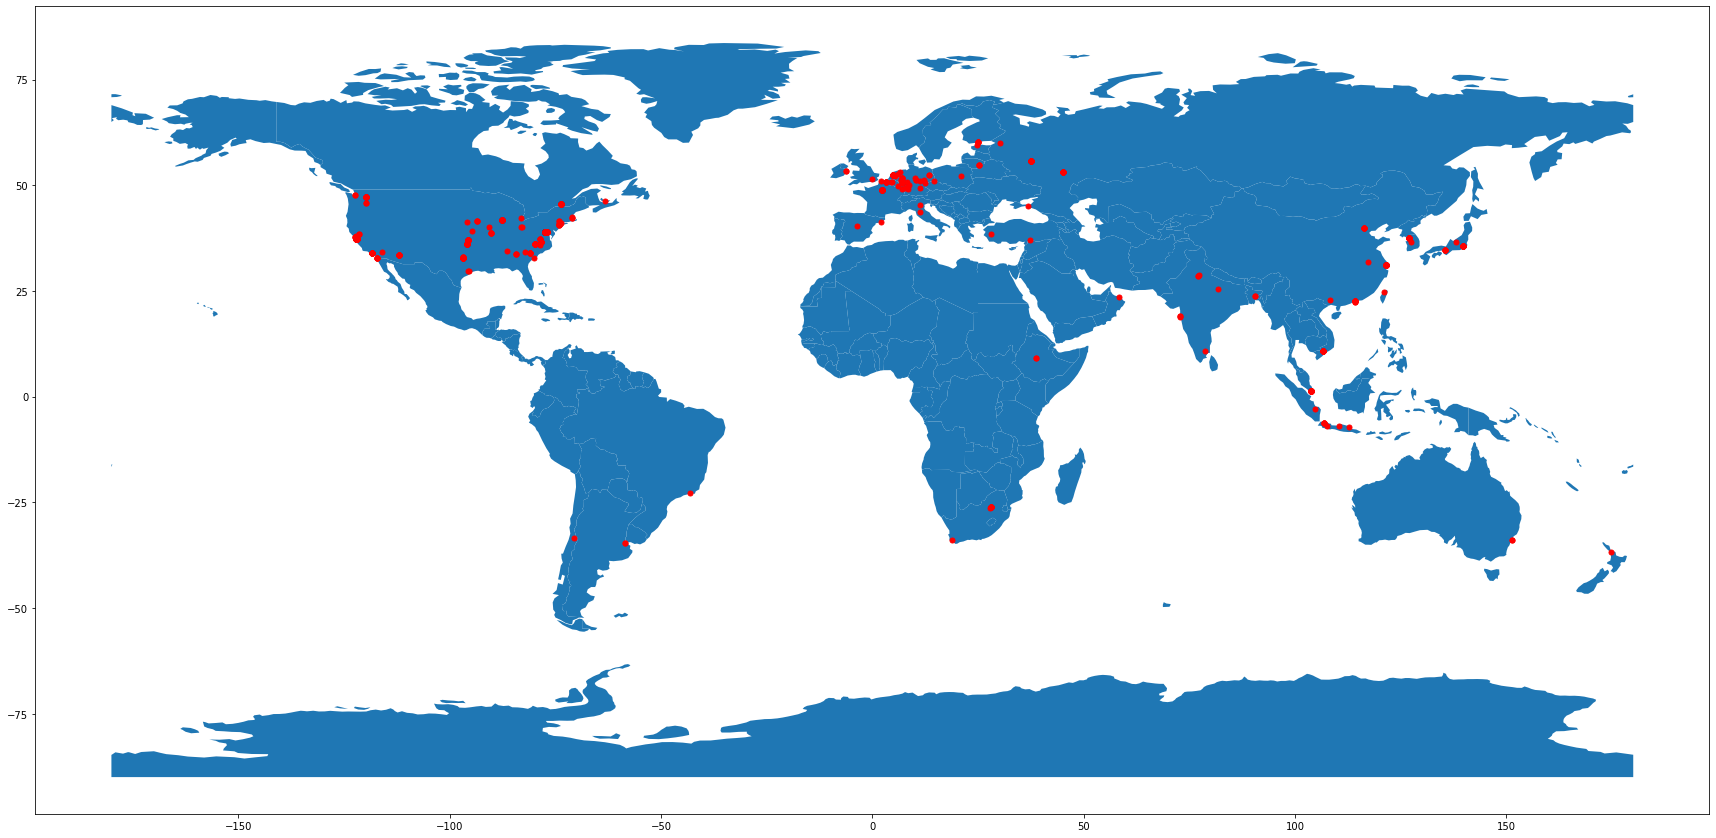

In [7]:
# Draw Map
geometry = [Point(xy) for xy in zip(ip_to_location['lng'], ip_to_location['lat'])]
gdf = GeoDataFrame(ip_to_location, geometry=geometry)   

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
gdf.plot(ax=world.plot(figsize=(30, 15)), marker='o', color='red', markersize=25);

In [66]:
ip_to_location['full_country'] = [pycountry.countries.get(alpha_2=str(country)).name for country in ip_to_location['Country']]

In [64]:
def country_to_continent(country_name):
    country_alpha2 = pc.country_name_to_country_alpha2(country_name)
    country_continent_code = pc.country_alpha2_to_continent_code(country_alpha2)
    country_continent_name = pc.convert_continent_code_to_continent_name(country_continent_code)
    return country_continent_name

In [67]:
ip_to_location['Continent'] = [country_to_continent(country) for country in ip_to_location['full_country']]

In [11]:
ip_to_location.to_csv('/home/kin672/gentb-summer22/Geography/ip_to_location_EXTENDED.csv', index = False)

In [16]:
res_and_lineage = pd.read_csv('/home/kin672/gentb-summer22/Creating Summaries from Relevant Files/7-18 Output/full_df_7-18.csv')
res_and_lineage

,Unnamed: 0,ID,Drug,Resistant,Lineage
0,14639,rename_mycobacterium_tuberculosis_m1418.0.vari...,rif,0,1
1,62297,1733.9086_res,rif,1,1.1
2,62258,1733.8986_res,rif,1,1.1.1
3,62986,1733.8968_res,rif,1,1.1.1
4,64741,1733.8960_res,rif,1,1.1.1
...,...,...,...,...,...
105620,65187,1_S1_L001_R1_001.sorted,eth,0,NaN
105621,65200,1_S1_L001_R2_001.sorted,eth,0,NaN
105622,86988,KL004,eth,0,NaN
105623,91447,IDR1400002533,eth,0,NaN


In [68]:
isolate_to_location['Lineage'] = [res_and_lineage.loc[(res_and_lineage.ID == isolate) & (res_and_lineage.Drug == 'rif'), 'Lineage'].values[0] for isolate in isolate_to_location.Isolate]
for drug in res_and_lineage.Drug.unique():
    isolate_to_location[drug] = [res_and_lineage.loc[(res_and_lineage.ID == isolate) & (res_and_lineage.Drug == drug), 'Resistant'].values[0] for isolate in isolate_to_location.Isolate]

In [69]:
def main_lineage_from_lineage(lineage):
    if ',' in lineage:
        return('Multiple')
    return(lineage[0:1])

isolate_to_location['Main Lineage'] = [main_lineage_from_lineage(lineage) for lineage in isolate_to_location.Lineage]

In [70]:
isolate_to_location

,Isolate,Location,Latitude,Longitude,City,State/Region,Country,Continent,Lineage,rif,...,str,cap,amk,cip,kan,levo,oflx,pas,eth,Main Lineage
0,snps.filt,"Leipzig, Saxony, DE",51.3566,12.2643,Leipzig,Saxony,Germany,Europe,4.2.1.1.1.1.1.1.i2,0,...,0,0,0,0,0,0,0,0,0,4
1,MFS-30_lib45960,"Stellenbosch, Western Cape, ZA",-33.9346,18.8668,Stellenbosch,Western Cape,South Africa,Africa,2.2.1.1.1,0,...,0,0,0,0,0,0,0,0,0,2
2,MFS-27_lib45957,"Stellenbosch, Western Cape, ZA",-33.9346,18.8668,Stellenbosch,Western Cape,South Africa,Africa,4.2.1.1.1.1.1.1.i1,0,...,0,0,0,0,0,0,0,0,0,4
3,MFS-117_lib47296,"Stellenbosch, Western Cape, ZA",-33.9346,18.8668,Stellenbosch,Western Cape,South Africa,Africa,4.2.1.1.1.1.1.1.i1,0,...,0,0,0,0,0,0,0,0,0,4
4,MFS-171_lib47350,"Stellenbosch, Western Cape, ZA",-33.9346,18.8668,Stellenbosch,Western Cape,South Africa,Africa,4.1.i1.2.1,0,...,0,0,0,0,0,0,0,0,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119,S0028_01_fastp,"Stellenbosch, Western Cape, ZA",-33.9346,18.8668,Stellenbosch,Western Cape,South Africa,Africa,"2.2.1.1.1,4.2.1.2.1.1",0,...,0,0,0,0,0,0,0,0,0,Multiple
120,S0008_01_fastp,"Stellenbosch, Western Cape, ZA",-33.9346,18.8668,Stellenbosch,Western Cape,South Africa,Africa,2.2.1.1.1,0,...,1,1,0,0,0,0,0,0,0,2
121,S0021_01_fastp,"Stellenbosch, Western Cape, ZA",-33.9346,18.8668,Stellenbosch,Western Cape,South Africa,Africa,4.2.1.2.1.1.i1,0,...,0,0,0,0,0,0,0,0,0,4
122,S0024_01_fastp,"Stellenbosch, Western Cape, ZA",-33.9346,18.8668,Stellenbosch,Western Cape,South Africa,Africa,4.1.i1.2.1,0,...,1,0,0,0,0,0,0,0,0,4


In [71]:
# Draw Map 2
geometry = [Point(xy) for xy in zip(isolate_to_location['Longitude'], isolate_to_location['Latitude'])]
gdf = GeoDataFrame(isolate_to_location, geometry=geometry)   

In [93]:
list(colors.keys())

['1', '2', '3', '4', 'Multiple']

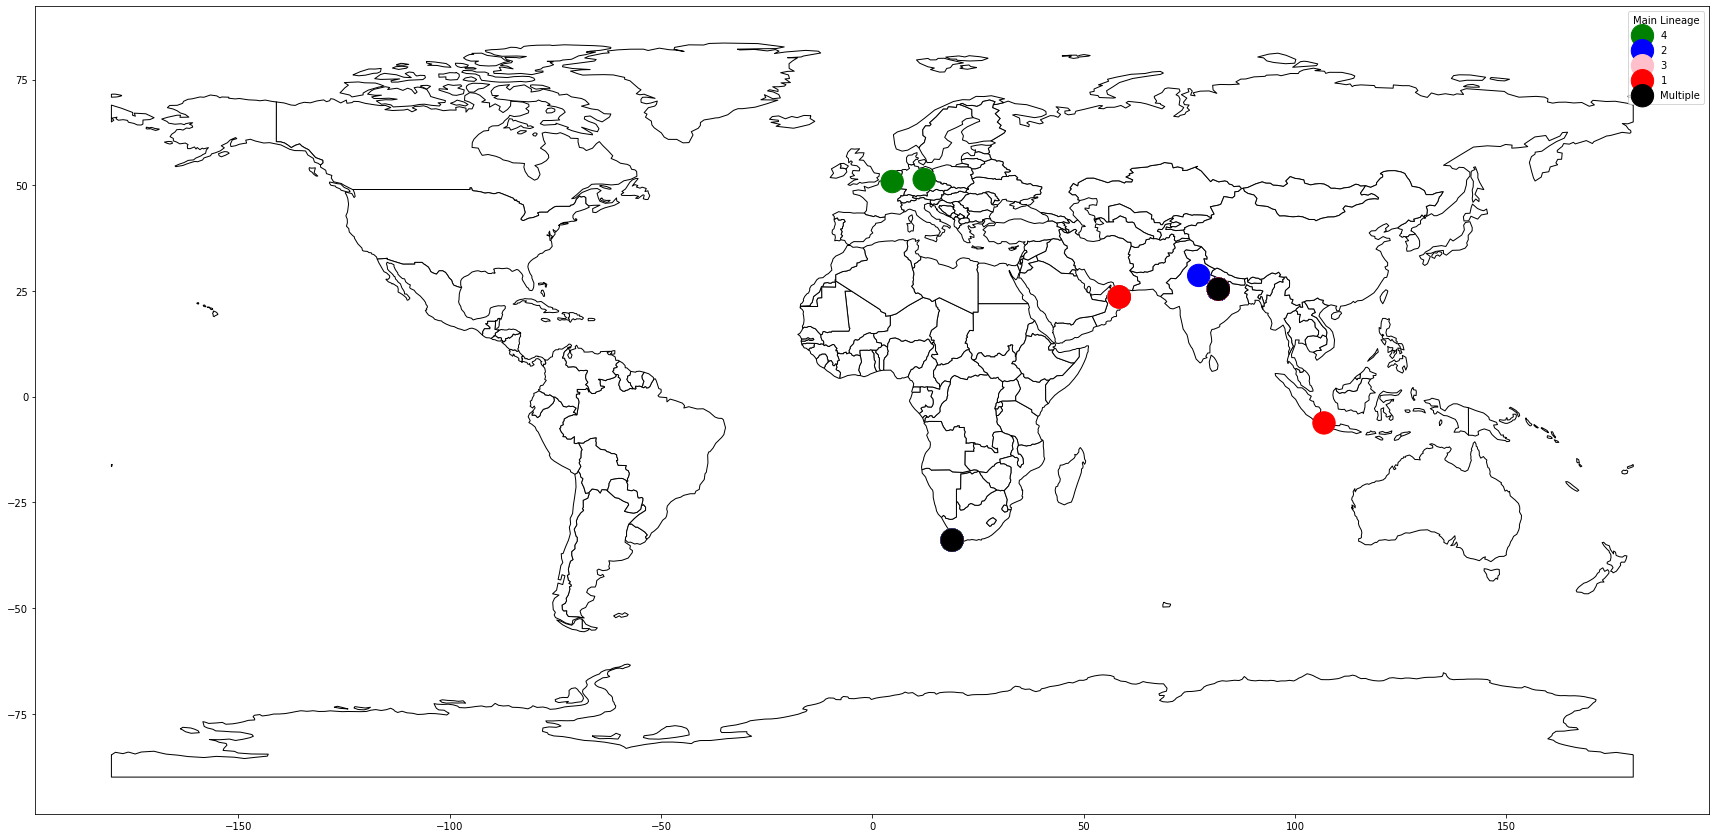

In [100]:
fig, ax = plt.subplots(figsize = (30, 20))
ax.set_aspect('equal')
world.plot(ax = ax, color='white', edgecolor='black')
colors = {'1': 'red', '2': 'blue', '3': 'pink', '4': 'green', 'Multiple': 'black'}
gdf['color'] = [colors[lineage] for lineage in gdf['Main Lineage']]
for main_lineage in gdf['Main Lineage'].unique():
    gdf_temp = gdf.loc[gdf['Main Lineage'] == main_lineage, :]
    gdf_temp.plot(ax=ax, marker='o', c = gdf_temp.color, label = main_lineage, markersize=500)
ax.legend(title = 'Main Lineage')
plt.show()